In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from collections import defaultdict
import random
import math
import numpy as np

class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        """
        Q-Learning Agent
        based on https://inst.eecs.berkeley.edu/~cs188/sp19/projects.html
        Instance variables you have access to
          - self.epsilon (exploration prob)
          - self.alpha (learning rate)
          - self.discount (discount rate aka gamma)

        Functions you should use
          - self.get_legal_actions(state) {state, hashable -> list of actions, each is hashable}
            which returns legal actions for a state
          - self.get_qvalue(state,action)
            which returns Q(state,action)
          - self.set_qvalue(state,action,value)
            which sets Q(state,action) := value
        !!!Important!!!
        Note: please avoid using self._qValues directly. 
            There's a special self.get_qvalue/set_qvalue for that.
        """

        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        """ Returns Q(state,action) """
        return self._qvalues[str(state)][action]

    def set_qvalue(self, state, action, value):
        """ Sets the Qvalue for [state,action] to the given value """
        self._qvalues[str(state)][action] = value

    #---------------------START OF YOUR CODE---------------------#

    def get_value(self, state):
        """
        Compute your agent's estimate of V(s) using current q-values
        V(s) = max_over_action Q(state,action) over possible actions.
        Note: please take into account that q-values can be negative.
        """
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0
        q_vals = [self.get_qvalue(state, a) for a in possible_actions]
        return max(q_vals)

    def update(self, state, action, reward, next_state):
        """
        You should do your Q-Value update here:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        """

        # agent parameters
        gamma = self.discount
        learning_rate = self.alpha

        q_sa_hat = reward + gamma * self.get_value(next_state)
        new_q_sa = learning_rate * q_sa_hat + (1 - learning_rate)*self.get_qvalue(state, action)

        self.set_qvalue(state, action, new_q_sa)

    def get_best_action(self, state):
        """
        Compute the best action to take in a state (using current q-values). 
        """
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        q_vals = np.array([self.get_qvalue(state, a) for a in possible_actions])
        return possible_actions[np.argmax(q_vals)]

    def get_action(self, state):
        """
        Compute the action to take in the current state, including exploration.  
        With probability self.epsilon, we should take a random action.
            otherwise - the best policy action (self.get_best_action).

        Note: To pick randomly from a list, use random.choice(list). 
              To pick True or False with a given probablity, generate uniform number in [0, 1]
              and compare it with your probability
        """

        # Pick Action
        possible_actions = self.get_legal_actions(state)
        action = None

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        # agent parameters:
        epsilon = self.epsilon
        if np.random.rand() < epsilon:
            chosen_action = np.random.choice(possible_actions)
        else:
            chosen_action = self.get_best_action(state)

        return chosen_action

In [37]:
import gym
env = gym.make("LunarLander-v2")

n_actions = env.action_space.n

In [47]:
agent = QLearningAgent(
    alpha=0.25, epsilon=0.25, discount=0.95,
    get_legal_actions=lambda s: range(n_actions))

In [50]:
def play_and_train(env, agent, t_max=300):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        # get agent to pick action given state s.
        a = agent.get_action(s)

        next_s, r, done, _ = env.step(a)

        # train (update) agent for state s
        agent.update(s, a, r, next_s)

        s = next_s
        total_reward += r
        if done:
            break

    return total_reward

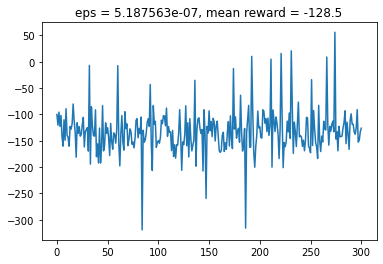

[-0.00600252  1.4221447  -0.6080132   0.49885523  0.0069623   0.13772416
  0.          0.        ]
[ 0.00253315  1.4109719   0.25655738  0.00229904 -0.00292842 -0.05811406
  0.          0.        ]
[ 7.9154968e-04  1.4176375e+00  8.0168620e-02  2.9855362e-01
 -9.1050804e-04 -1.8159447e-02  0.0000000e+00  0.0000000e+00]
[ 0.00212917  1.4017656   0.21564105 -0.40686098 -0.00246033 -0.04884594
  0.          0.        ]
[-0.00509329  1.4141085  -0.5159199   0.14169227  0.00590873  0.11686353
  0.          0.        ]
[-5.7792664e-04  1.4215598e+00 -5.8552641e-02  4.7287935e-01
  6.7647017e-04  1.3263117e-02  0.0000000e+00  0.0000000e+00]
[ 0.00420351  1.4166787   0.42575926  0.25592795 -0.00486408 -0.09644075
  0.          0.        ]
[ 0.00654507  1.4140121   0.6629311   0.13740069 -0.00757732 -0.15016374
  0.          0.        ]
[-1.03569029e-04  1.41356063e+00 -1.05012953e-02  1.17360584e-01
  1.26735133e-04  2.37870240e-03  0.00000000e+00  0.00000000e+00]
[-1.4081955e-03  1.4222064e+0

[ 0.00655203  1.4218596   0.6636317   0.48617575 -0.00758535 -0.1503225
  0.          0.        ]
[ 0.00589857  1.4015615   0.5974372  -0.4159498  -0.00682809 -0.13532847
  0.          0.        ]
[-0.00277891  1.4217751  -0.28149158  0.48243663  0.00322688  0.0637621
  0.          0.        ]
[-9.9954603e-04  1.4088533e+00 -1.0127078e-01 -9.1864303e-02
  1.1651445e-03  2.2939354e-02  0.0000000e+00  0.0000000e+00]
[ 0.00296898  1.4205064   0.30071336  0.42605385 -0.00343356 -0.06811609
  0.          0.        ]
[-0.00223494  1.402492   -0.22639208 -0.3745816   0.00259654  0.05128114
  0.          0.        ]
[-0.00290241  1.4058064  -0.29398918 -0.22727114  0.00336986  0.06659288
  0.          0.        ]
[-0.00642796  1.421391   -0.651103    0.46535698  0.00745525  0.14748457
  0.          0.        ]
[ 0.00157185  1.4093194   0.1591964  -0.07114033 -0.00181461 -0.03606037
  0.          0.        ]
[ 0.00536718  1.4074703   0.54362804 -0.15333901 -0.00621248 -0.12313994
  0.          

KeyboardInterrupt: 

In [51]:
from IPython.display import clear_output

rewards = []
for i in range(1001):
    rewards.append(play_and_train(env, agent))
    agent.epsilon *= 0.99

    if i % 100 == 0:
        clear_output(True)
        plt.title('eps = {:e}, mean reward = {:.1f}'.format(agent.epsilon, np.mean(rewards[-10:])))
        plt.plot(rewards)
        plt.show()